In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
digits = load_digits()

In [ ]:
x = digits.data
y = digits.target

In [ ]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
svm_clf = SVC(gamma=0.001,C=100)

In [ ]:
svm_clf.fit(x_train,y_train)

SVC(C=100, gamma=0.001)

In [ ]:
y_pred = svm_clf.predict(x_test)

In [ ]:
print("accuracy score : ",accuracy_score(y_test,y_pred))
print("confussion matrix : ", confusion_matrix(y_test,y_pred))
print("classification report : ",classification_report(y_test,y_pred))

accuracy score :  0.9888888888888889
confussion matrix :  [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  1  0 39]]
classification report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97  

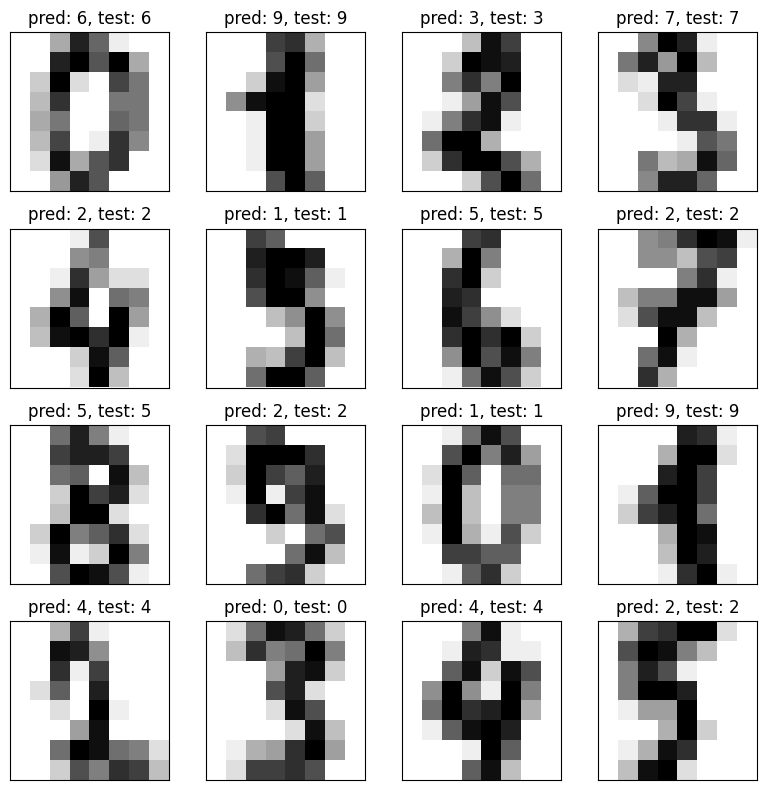

In [ ]:
fig,ax = plt.subplots(4, 4, figsize=(8,8))
for i,ax in enumerate(ax.flat):
    ax.imshow(digits.images[i],cmap='binary')
    ax.set(xticks=[],yticks=[])
    ax.set_title(f"pred: {y_pred[i]}, test: {y_test[i]}")
plt.tight_layout()
plt.show()


In [25]:
from sklearn.manifold import Isomap

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


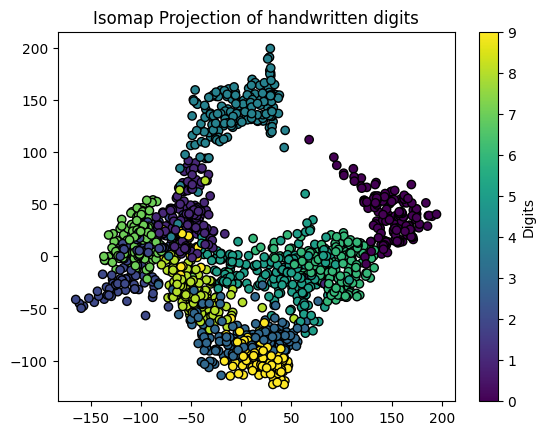

In [26]:
iso = Isomap(n_components=2)
projection = iso.fit_transform(x)
plt.scatter(projection[:,0],projection[:,1],c=digits.target, edgecolor='k',cmap='viridis')
plt.colorbar(ticks=range(10), label='Digits')
plt.title("Isomap Projection of handwritten digits")
plt.show()


In [22]:
def view_digits(index):
    plt.imshow(digits.images[index],cmap=plt.cm.gray_r)
    plt.title(f"Orignal: {digits.target[index]}")
    plt.show()

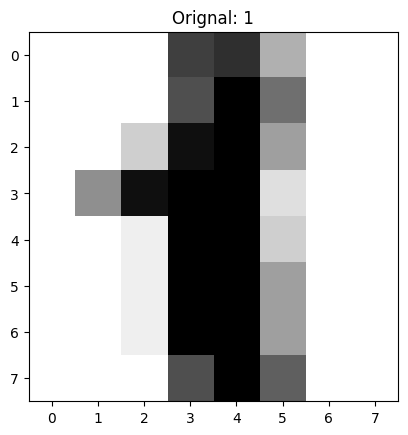

In [23]:
view_digits(1)

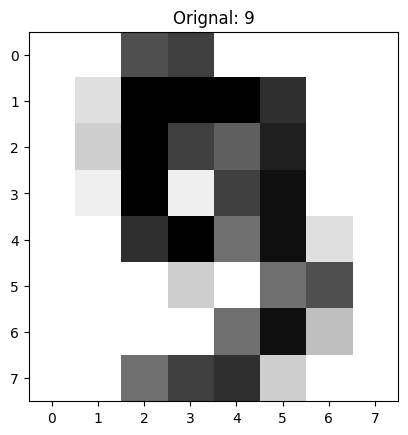

In [24]:
view_digits(9)